# Demo实战

# 函数库导入

In [1]:
##  基础函数库
import numpy as np 

## 导入画图库
import matplotlib.pyplot as plt
import seaborn as sns

## 导入决策树模型函数
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# 训练模型

In [2]:
##Demo演示LogisticRegression分类

## 构造数据集
x_fearures = np.array([[-1, -2], [-2, -1], [-3, -2], [1, 3], [2, 1], [3, 2]])
y_label = np.array([0, 1, 0, 1, 0, 1])

## 调用决策树回归模型
tree_clf = DecisionTreeClassifier()

## 调用决策树模型拟合构造的数据集
tree_clf = tree_clf.fit(x_fearures, y_label)

# 数据和模型可视化（需要用到graphviz可视化库）

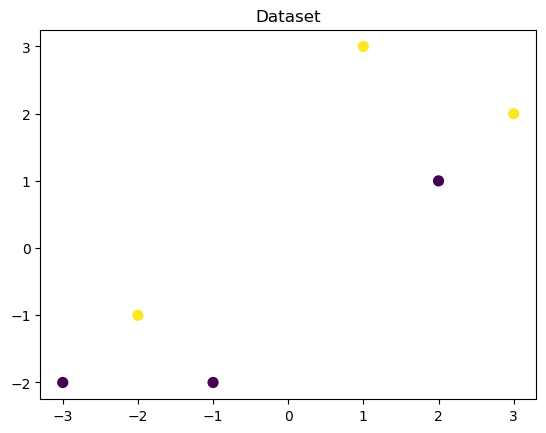

In [3]:
## 可视化构造的数据样本点
plt.figure()
plt.scatter(x_fearures[:,0],x_fearures[:,1], c=y_label, s=50, cmap='viridis')
plt.title('Dataset')
plt.show()

In [4]:
# from IPython.display import display, Javascript

# display(Javascript('IPython.notebook.kernel.restart()'))

In [6]:
## 可视化决策树
import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("pengunis")
# graph.view()

'pengunis.pdf'

# 模型预测

In [7]:
## 创建新样本
x_fearures_new1 = np.array([[0, -1]])
x_fearures_new2 = np.array([[2, 1]])

## 在训练集和测试集上分布利用训练好的模型进行预测
y_label_new1_predict = tree_clf.predict(x_fearures_new1)
y_label_new2_predict = tree_clf.predict(x_fearures_new2)

print('The New point 1 predict class:\n',y_label_new1_predict)
print('The New point 2 predict class:\n',y_label_new2_predict)

The New point 1 predict class:
 [1]
The New point 2 predict class:
 [0]


# 基于企鹅数据集的决策树实战

# 函数库导入

In [11]:
##  基础函数库
import numpy as np 
import pandas as pd

## 绘图函数库
import matplotlib.pyplot as plt
import seaborn as sns

# 数据读取/载入

In [12]:
data = pd.read_csv('https://tianchi-media.oss-cn-beijing.aliyuncs.com/DSW/6tree/penguins_raw.csv')

In [22]:
## 为了方便我们仅选取四个简单的特征，有兴趣的同学可以研究下其他特征的含义以及使用方法
data = data[['Species','Culmen Length (mm)','Culmen Depth (mm)',
            'Flipper Length (mm)','Body Mass (g)']]

In [26]:
data.fillna(data.mean(numeric_only=True))# 均值填充
data.isnull().any() #判断某一列是否存在空值

Species                False
Culmen Length (mm)     False
Culmen Depth (mm)      False
Flipper Length (mm)    False
Body Mass (g)          False
dtype: bool

In [27]:
data['Species'].unique()# 查看企鹅有多少种

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Gentoo penguin (Pygoscelis papua)',
       'Chinstrap penguin (Pygoscelis antarctica)'], dtype=object)

In [28]:
## 利用value_counts函数查看每个类别数量
pd.Series(data['Species']).value_counts()

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

# 可视化

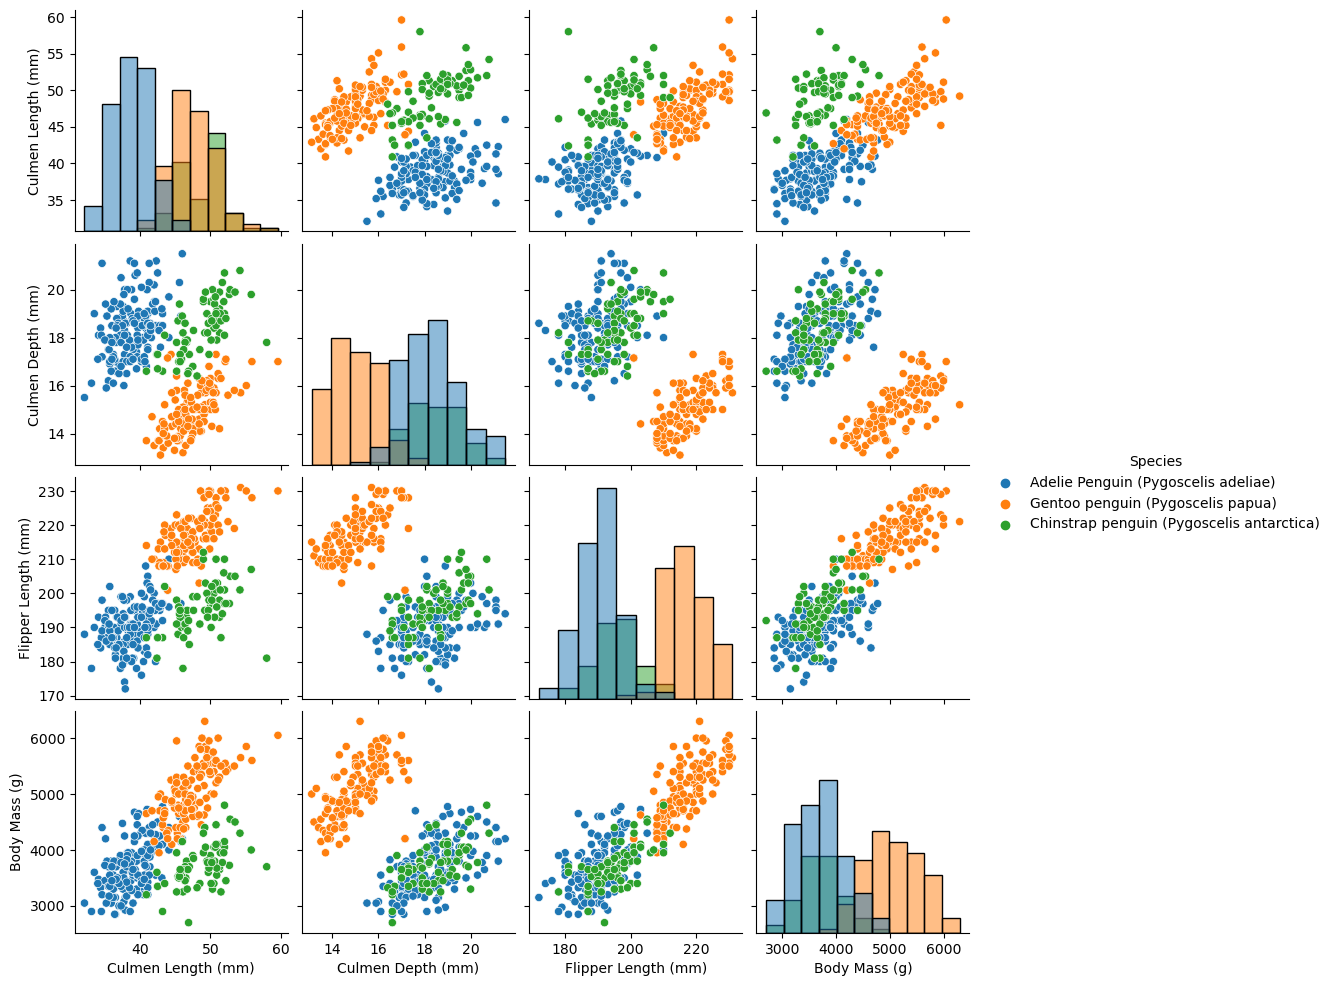

In [29]:
## 特征与标签组合的散点可视化
sns.pairplot(data=data, diag_kind='hist', hue= 'Species')
plt.show()

In [30]:
'''为了方便我们将标签转化为数字
       'Adelie Penguin (Pygoscelis adeliae)'        ------0
       'Gentoo penguin (Pygoscelis papua)'          ------1
       'Chinstrap penguin (Pygoscelis antarctica)   ------2 '''

def trans(x):
    if x == data['Species'].unique()[0]:
        return 0
    if x == data['Species'].unique()[1]:
        return 1
    if x == data['Species'].unique()[2]:
        return 2

data['Species'] = data['Species'].apply(trans)

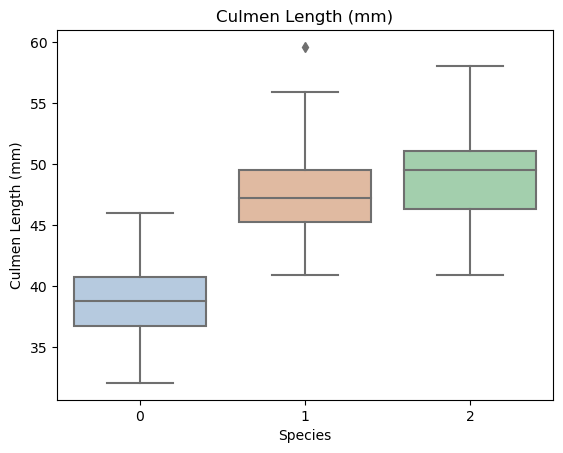

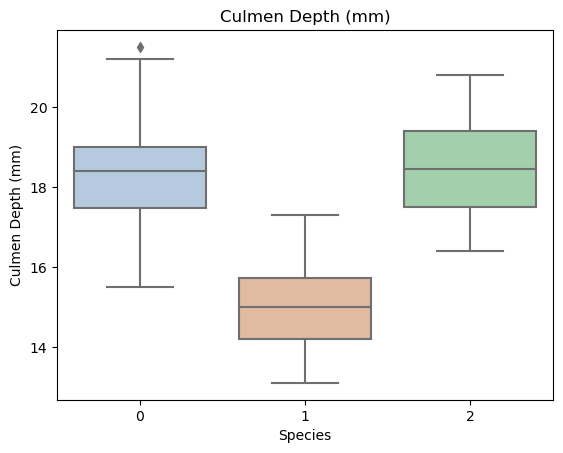

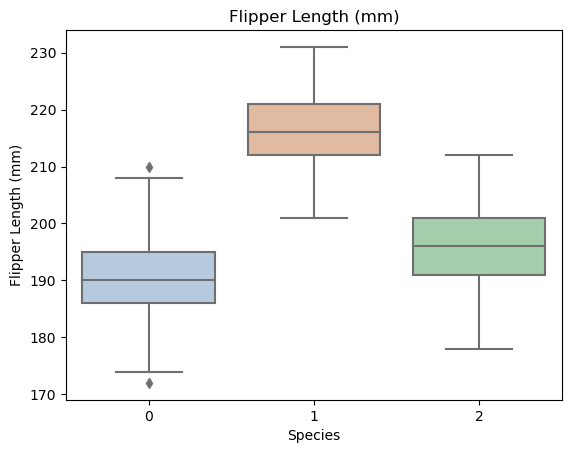

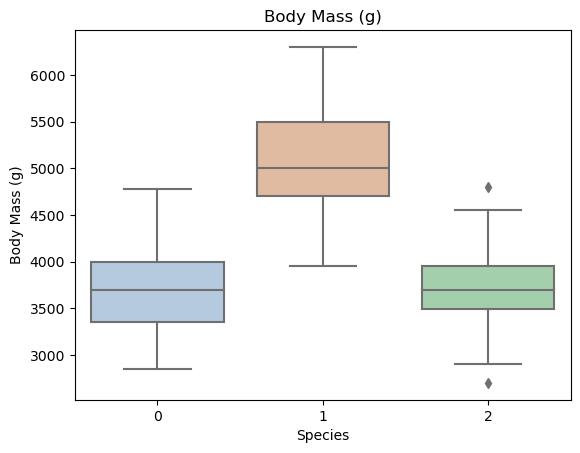

In [31]:
for col in data.columns:
    if col != 'Species':
        sns.boxplot(x='Species', y=col, saturation=0.5, palette='pastel', data=data)
        plt.title(col)
        plt.show()

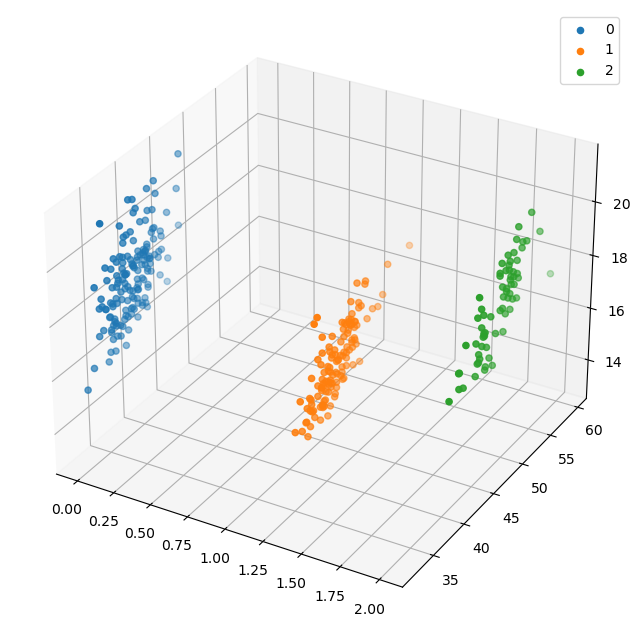

In [32]:
# 选取其前三个特征绘制三维散点图
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

data_class0 = data[data['Species']==0].values
data_class1 = data[data['Species']==1].values
data_class2 = data[data['Species']==2].values
# 'setosa'(0), 'versicolor'(1), 'virginica'(2)
ax.scatter(data_class0[:,0], data_class0[:,1], data_class0[:,2],label=data['Species'].unique()[0])
ax.scatter(data_class1[:,0], data_class1[:,1], data_class1[:,2],label=data['Species'].unique()[1])
ax.scatter(data_class2[:,0], data_class2[:,1], data_class2[:,2],label=data['Species'].unique()[2])
plt.legend()

plt.show()

# 利用 决策树模型 在二分类上 进行训练和预测


In [51]:
data_target_part=data[data['Species'].isin([0,1])]['Species']
data_features_part = data[data['Species'].isin([0,1])][['Culmen Length (mm)','Culmen Depth (mm)',
            'Flipper Length (mm)','Body Mass (g)']]

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_features_part, data_target_part, test_size = 0.2, random_state = 2020)

In [46]:
## 从sklearn中导入决策树模型
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
## 定义 决策树模型 
clf = DecisionTreeClassifier(criterion='entropy')
# 在训练集上训练决策树模型
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [49]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("penguins")
graph.view()

'penguins.pdf'

The accuracy of the Logistic Regression is: 0.9954545454545455
The accuracy of the Logistic Regression is: 1.0
The confusion matrix result:
 [[31  0]
 [ 0 25]]


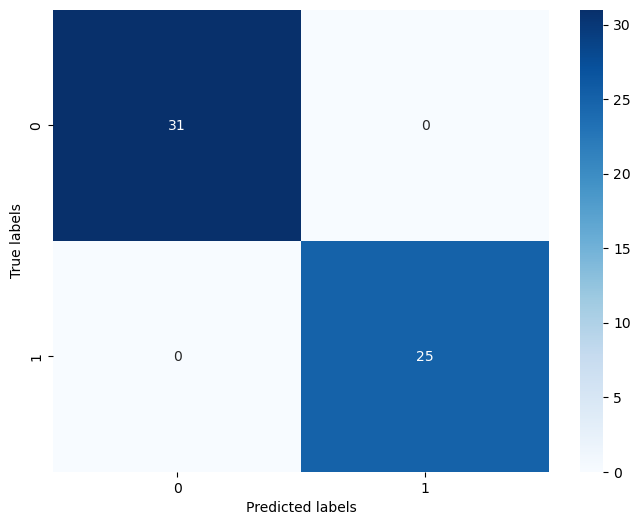

In [50]:
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)
from sklearn import metrics

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()